# Plot ocean data

In the second cell below, enter the longitude and latitude ranges of your box in the variables `lon_min`, `lon_max`, `lat_min`, `lat_max`, below.

You do not need to understand how this code works.  The plots are being made in Ferret, a specialized and open source oceanographic data handling package developed by NOAA.

In [1]:
#=================================================================
# This first cell contains some necessary initialization commands.
#=================================================================
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
import numpy as np
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
%load_ext ferretmagic

! Enter_GO fland
! Exit_GO


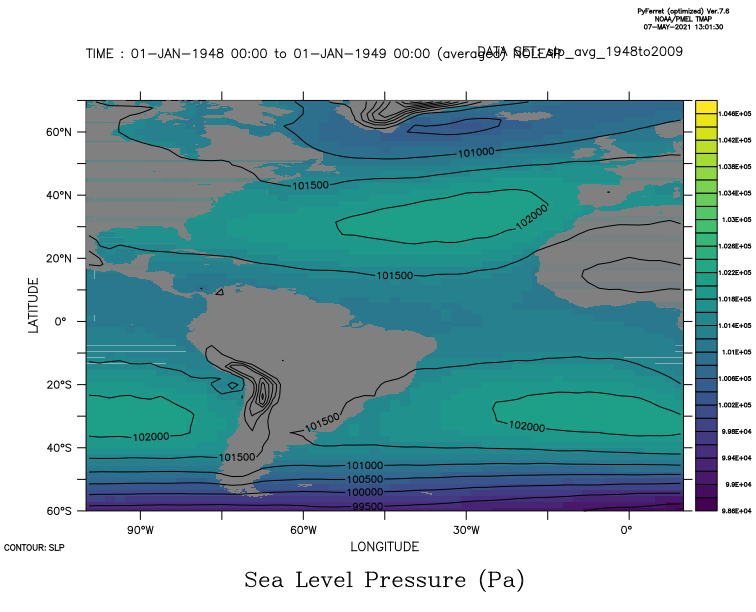

In [7]:
%%ferret
!=============Set region limits here==============
let lon_min = -100
let lon_max = 10
let lat_min = -60
let lat_max = 70
!=================================================

let lon_mid = (`lon_min` + `lon_max`)/2
let lat_mid = (`lat_min` + `lat_max`)/2

use /mnt/courses/eos2585/CORE2/clims/slp_avg_1948to2009.nc

shade slp[d=1,x=`lon_min`:`lon_max`,y=`lat_min`:`lat_max`,l=@AVE]; go fland
contour /over slp[d=1,x=`lon_min`:`lon_max`,y=`lat_min`:`lat_max`,l=@AVE]